In [1]:
# This is based on https://github.com/jlu90/Predicting-House-Prices-with-Linear-Regression

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('clean_data/train_clean_from_github.csv')

In [4]:
data.rename(columns = {
    'MS SubClass':'Building Class',
    'MS Zoning': 'Zoning Class',
    'Street' : 'Street Type',
    'Lot Config':'Lot Configuration',
    'Condition1': 'Proximity to Main Road or Railroad 1',
    'Condition 2' : 'Proximity to Main Road or Railroad 2',
    'BldgType':'Building Type',
    'Overall Qual': 'Overall Quality',
    'Overall Cond': 'Overall Condition',
    'Year Remod/Add': 'Remodel Date',
    'Roof Matl': 'Roof Material',
    'Exterior 1st':'Exterior Covering 1',
    'Exterior 2nd': 'Exterior Covering 2',
    'Mas Vnr Type': 'Masonry Veneer Type',
    'Mas Vnr Area': 'Masonry Veneer Area',
    'Exter Qual': 'Exterior Material Quality',
    'Exter Cond': 'Exterior Condition Quality',
    'Bsmt Qual':'Basement Quality',
    'Bsmt Cond': 'Basement Condition', 
    'Basmt Exposure': 'Basement Exposure',
    'BsmtFin Type 1': 'Quality of Finished Basement 1',
    'BsmtFin Type 2': 'Quality of Finished Basement 2',
    'BsmtFin SF 1': 'Square Feet of Finished Basement 1',
    'BsmtFin SF 2': 'Square Feet of Finished Basement 2',
    'Bsmt Unf SF': 'Square Feet of Unfinished Basement',
    'Total Bsmt SF': 'Total Basement Square Feet',
    'Heating': 'Heating Type',
    'Heating QC': 'Heating Quality and Condition',
    '1st Flr SF': '1st Floor Square Feet',
    '2nd Flr SF': '2nd Floor Square Feet',
    'Low Qual Fin SF':'Low Quality Finished Square Feet',
    'Gr Liv Area': 'Above-Ground Living Area',
    'Bsmt Full Bath': 'Basement Full Bathrooms',
    'Bsmt Half Bath': 'Basement Half Bathrooms',
    'Full Bath': 'Full Bathrooms',
    'Half Bath': 'Half Bathrooms',
    'Bedroom': 'Bedrooms',
    'Kitchen':'Kitchens',
    'Kitchen Qual': 'Kitchen Quality', 
    'TotRms AbvGrd': 'Total Rooms Above Grade',
    'Functional':'Functionality',
    'Fireplace Qu': 'Fireplace Quality',
    'Garage Yr Blt': "Year Garage Built",
    'Garage Finish': 'Interior Finish of Garage',
    'Garage Cars': 'Size of Garage (Cars)',
    'Garage Area': 'Size of Garage (Square Feet)',
    'Garage Qual':'Garage Quality',
    'Garage Cond': 'Garage Condition',
    'Paved Drive': 'Extent of Driveway Pavement', 
    'Wood Deck SF': 'Wood Deck Square Feet',
    'Open Porch SF': 'Open Porch Square Feet',
    'Enclosed Porch': 'Enclosed Porch Square Feet',
    '3Ssn Porch': '3 Season Porch Square Feet', 
    'Screen Porch': 'Screen Porch Square Feet',
    'Pool Area': 'Pool Area (Square Feet)',
    'Pool QC': 'Pool Quality',
    'Fence':'Fence Quality',
    'Misc Feature':'Miscellaneous Feature',
    'Misc Val': 'Value of Miscellaneous Feature',
    'Mo Sold': 'Month Sold',
    'Yr Sold': 'Year Sold',
    'SalePrice': 'Sale Price'
}, inplace = True)

In [5]:
data.head()

,Unnamed: 0,Id,PID,Building Class,Zoning Class,Lot Frontage,Lot Area,Street Type,Alley,Lot Shape,...,Screen Porch Square Feet,Pool Area (Square Feet),Pool Quality,Fence Quality,Miscellaneous Feature,Value of Miscellaneous Feature,Month Sold,Year Sold,Sale Type,Sale Price
0,0,109,533352170,60,RL,69.0552,13517,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,March,2010,WD,130500
1,1,544,531379050,60,RL,43.0000,11492,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,April,2009,WD,220000
2,2,153,535304180,20,RL,68.0000,7922,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,January,2010,WD,109000
3,3,318,916386060,60,RL,73.0000,9802,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,April,2010,WD,174000
4,4,255,906425045,50,RL,82.0000,14235,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,March,2010,WD,138500


In [6]:
def create_total_baths(df):
    df['Total # of Bathrooms'] = df['Full Bathrooms'] + df['Basement Full Bathrooms'] + 0.5 * (df['Basement Half Bathrooms'] + df['Half Bathrooms'])
    
def drop_baths_columns(df):
    '''
    Drops columns used to create "Total Baths" feature
    '''
    df.drop(columns = ['Full Bathrooms', 'Basement Full Bathrooms', 'Basement Half Bathrooms', 'Half Bathrooms'], inplace = True)

def create_liveable_sf(df):
    df['Liveable SF'] = df['Square Feet of Finished Basement 1'] + df['Square Feet of Finished Basement 2'] + df['Above-Ground Living Area']

def drop_liveable_sf_columns(df):
    '''
    Drops all columns directly related to "Liveable SF" feature
    '''
    df.drop(columns = ['Square Feet of Finished Basement 1', 'Square Feet of Finished Basement 2', 'Above-Ground Living Area', '1st Floor Square Feet', '2nd Floor Square Feet'], inplace = True)

In [7]:
create_total_baths(data)
drop_baths_columns(data)
create_liveable_sf(data)
drop_liveable_sf_columns(data)

In [8]:
group1 = ['StoneBr', 'NridgeHt', 'Veenker', 'NoRidge', 'GrnHill']
group2 = ['SawyerW', 'CollgCr', 'Somerst', 'Gilbert', 'Crawfor', 'NAmes', 'ClearCr', 'Blmngtn', 'Greens']

data['Neighborhood 1'] = data['Neighborhood'].map(lambda name: 1 if name in group1 else 0)
data['Neighborhood 2'] = data['Neighborhood'].map(lambda name: 1 if name in group2 else 0)

In [9]:
data.drop(columns = 'Neighborhood', inplace = True)

In [10]:
data['Building Class 20'] = data['Building Class'].map(lambda subclass: 1 if subclass == 20 else 0)
data['Building Class 60'] = data['Building Class'].map(lambda subclass: 1 if subclass == 60 else 0)
data['Building Class 120'] = data['Building Class'].map(lambda subclass: 1 if subclass == 120 else 0)

In [11]:
data.drop(columns = 'Building Class', inplace = True)

In [12]:
data['Close to Offsite'] = data['Condition 1'].map(lambda x: 1 if x in ['PosN', 'PosA'] else 0)
data['Close to Busy Street'] = data['Condition 1'].map(lambda x: 1 if x in ['Artery', 'Feedr'] else 0)

In [13]:
data.drop(columns = 'Condition 1', inplace = True)

In [14]:
data['Stone Veneer'] = data['Masonry Veneer Type'].map(lambda x: 1 if x == 'Stone' else 0)
data.drop(columns = 'Masonry Veneer Type', inplace = True)

In [15]:
data['New Sale?'] = data['Sale Type'].map(lambda x: 1 if x == 'New' else 0)
data['Estate Sale?'] = data['Sale Type'].map(lambda x: 1 if x == 'COD' else 0)
data.drop(columns = 'Sale Type', inplace = True)

In [16]:
data['Good Liveable Basement?'] = data['Quality of Finished Basement 1'].map(lambda x: 1 if x == 'GLQ' else 0)
data.drop(columns = 'Quality of Finished Basement 1', inplace=True)

In [17]:
data['Excellent Kitchen'] = data['Kitchen Quality'].map(lambda x: 1 if x == 'Ex' else 0)
data.drop(columns = 'Kitchen Quality', inplace = True)

In [18]:
data['Good Zoning Cluster'] = data['Zoning Class'].map(lambda x: 1 if x in ['FV', 'RL', 'RH'] else 0)
data.drop(columns = 'Zoning Class', inplace = True)

In [19]:
data.drop(columns= ['Id', 'PID', 'Unnamed: 0'], inplace=True)
data.head()

,Lot Frontage,Lot Area,Street Type,Alley,Lot Shape,Land Contour,Utilities,Lot Configuration,Land Slope,Proximity to Main Road or Railroad 2,...,Building Class 60,Building Class 120,Close to Offsite,Close to Busy Street,Stone Veneer,New Sale?,Estate Sale?,Good Liveable Basement?,Excellent Kitchen,Good Zoning Cluster
0,69.0552,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Norm,...,1,0,0,0,0,0,0,1,0,1
1,43.0000,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Norm,...,1,0,0,0,0,0,0,1,0,1
2,68.0000,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Norm,...,0,0,0,0,0,0,0,1,0,1
3,73.0000,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Norm,...,1,0,0,0,0,0,0,0,0,1
4,82.0000,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Norm,...,0,0,0,0,0,0,0,0,0,1


In [20]:
# Missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Pool Quality,2042,0.995612
Miscellaneous Feature,1986,0.968308
Alley,1911,0.931741
Fence Quality,1651,0.804973
Fireplace Quality,1000,0.487567
Garage Condition,114,0.055583
Garage Quality,114,0.055583
Year Garage Built,114,0.055583
Interior Finish of Garage,114,0.055583
Garage Type,113,0.055095


In [21]:
#dealing with missing data
data = data.drop((missing_data[missing_data['Total'] > 1]).index,1)
data.isnull().sum().max() #just checking that there's no missing data missing...

0

In [22]:
train = pd.get_dummies(data.drop(columns='Sale Price'))
y_train = data['Sale Price']

## Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train, y_train)

y_train_pred = lr.predict(train)

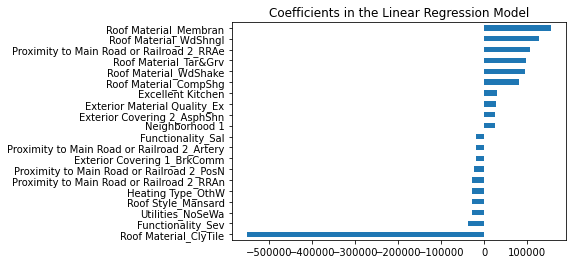

In [24]:
coefs = pd.Series(list(lr.coef_), index=train.columns)

imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")

plt.title("Coefficients in the Linear Regression Model")
plt.show()

## Lasso Regression

In [25]:
from sklearn.linear_model import LassoCV
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 50000, cv = 10)
lasso.fit(train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

Best alpha : 1.0


In [26]:
print("Try again for more precision with alphas centered around " + str(alpha))
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, 
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
                          alpha * 1.4], 
                max_iter = 50000, cv = 10)
lasso.fit(train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

Try again for more precision with alphas centered around 1.0
Best alpha : 1.4


Lasso picked 162 features and eliminated the other 16 features


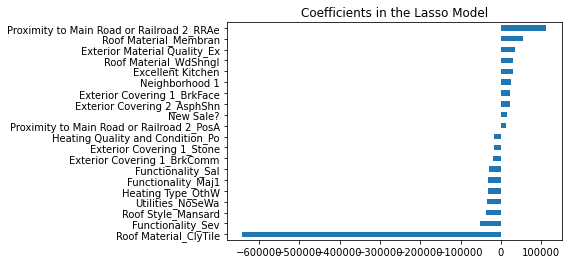

In [27]:
# Plot important coefficients
coefs = pd.Series(lasso.coef_, index = train.columns)
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

# What are the dropped coefficients? We will need this to create the writeup

In [28]:
print(coefs[(coefs == 0)])

Utilities_AllPub                    0.0
Lot Configuration_Corner            0.0
Land Slope_Gtl                      0.0
Bldg Type_Duplex                   -0.0
Roof Material_Tar&Grv               0.0
Exterior Covering 1_CBlock          0.0
Exterior Covering 1_WdShing         0.0
Exterior Covering 2_HdBoard         0.0
Exterior Covering 2_Stucco          0.0
Exterior Material Quality_Gd       -0.0
Exterior Condition Quality_TA       0.0
Foundation_PConc                   -0.0
Heating Type_GasW                  -0.0
Heating Quality and Condition_Gd    0.0
Electrical_FuseF                    0.0
Extent of Driveway Pavement_N       0.0
dtype: float64


In [41]:
train.columns[train.columns.str.contains('Exterior Covering')]

Index(['Exterior Covering 1_AsbShng', 'Exterior Covering 1_AsphShn',
       'Exterior Covering 1_BrkComm', 'Exterior Covering 1_BrkFace',
       'Exterior Covering 1_CBlock', 'Exterior Covering 1_CemntBd',
       'Exterior Covering 1_HdBoard', 'Exterior Covering 1_ImStucc',
       'Exterior Covering 1_MetalSd', 'Exterior Covering 1_Plywood',
       'Exterior Covering 1_Stone', 'Exterior Covering 1_Stucco',
       'Exterior Covering 1_VinylSd', 'Exterior Covering 1_Wd Sdng',
       'Exterior Covering 1_WdShing', 'Exterior Covering 2_AsbShng',
       'Exterior Covering 2_AsphShn', 'Exterior Covering 2_Brk Cmn',
       'Exterior Covering 2_BrkFace', 'Exterior Covering 2_CBlock',
       'Exterior Covering 2_CmentBd', 'Exterior Covering 2_HdBoard',
       'Exterior Covering 2_ImStucc', 'Exterior Covering 2_MetalSd',
       'Exterior Covering 2_Plywood', 'Exterior Covering 2_Stone',
       'Exterior Covering 2_Stucco', 'Exterior Covering 2_VinylSd',
       'Exterior Covering 2_Wd Sdng', 'Ext

In [40]:
train.columns[train.columns.str.contains('Heating')]

Index(['Heating Type_GasA', 'Heating Type_GasW', 'Heating Type_Grav',
       'Heating Type_OthW', 'Heating Type_Wall',
       'Heating Quality and Condition_Ex', 'Heating Quality and Condition_Fa',
       'Heating Quality and Condition_Gd', 'Heating Quality and Condition_Po',
       'Heating Quality and Condition_TA'],
      dtype='object')

## Decision Tree Regression

In [29]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

dtr = DecisionTreeRegressor(max_depth=3)
dtr.fit(train, y_train)

DecisionTreeRegressor(max_depth=3)

''

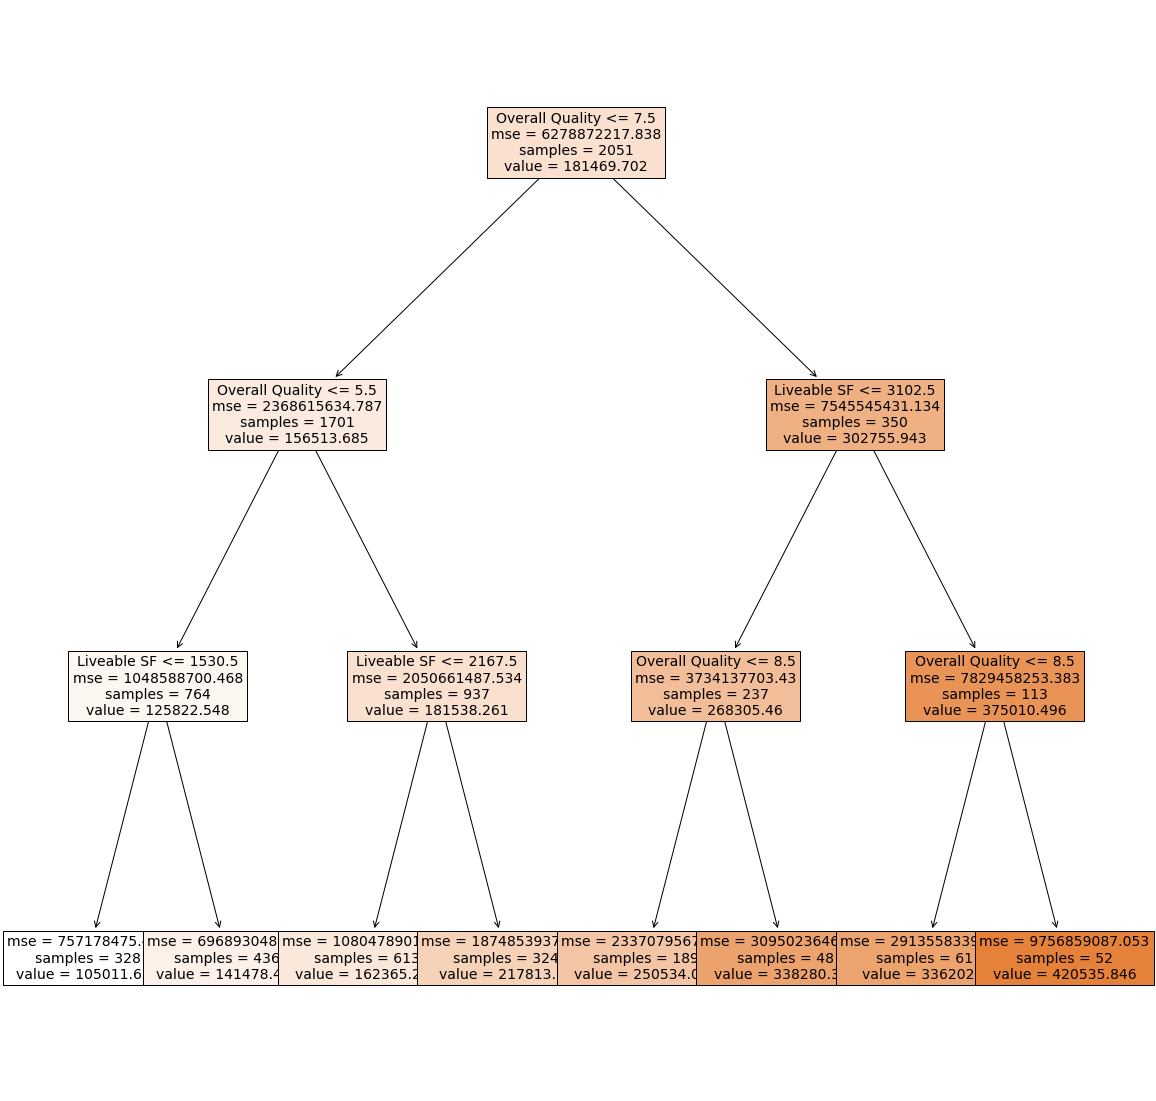

In [30]:
fig = plt.figure(figsize=(20, 20))
plot_tree(dtr, feature_names=train.columns, fontsize=14, filled=True)
''

## Random Forest Regression

In [31]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth=2, random_state=0)
rfr.fit(train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

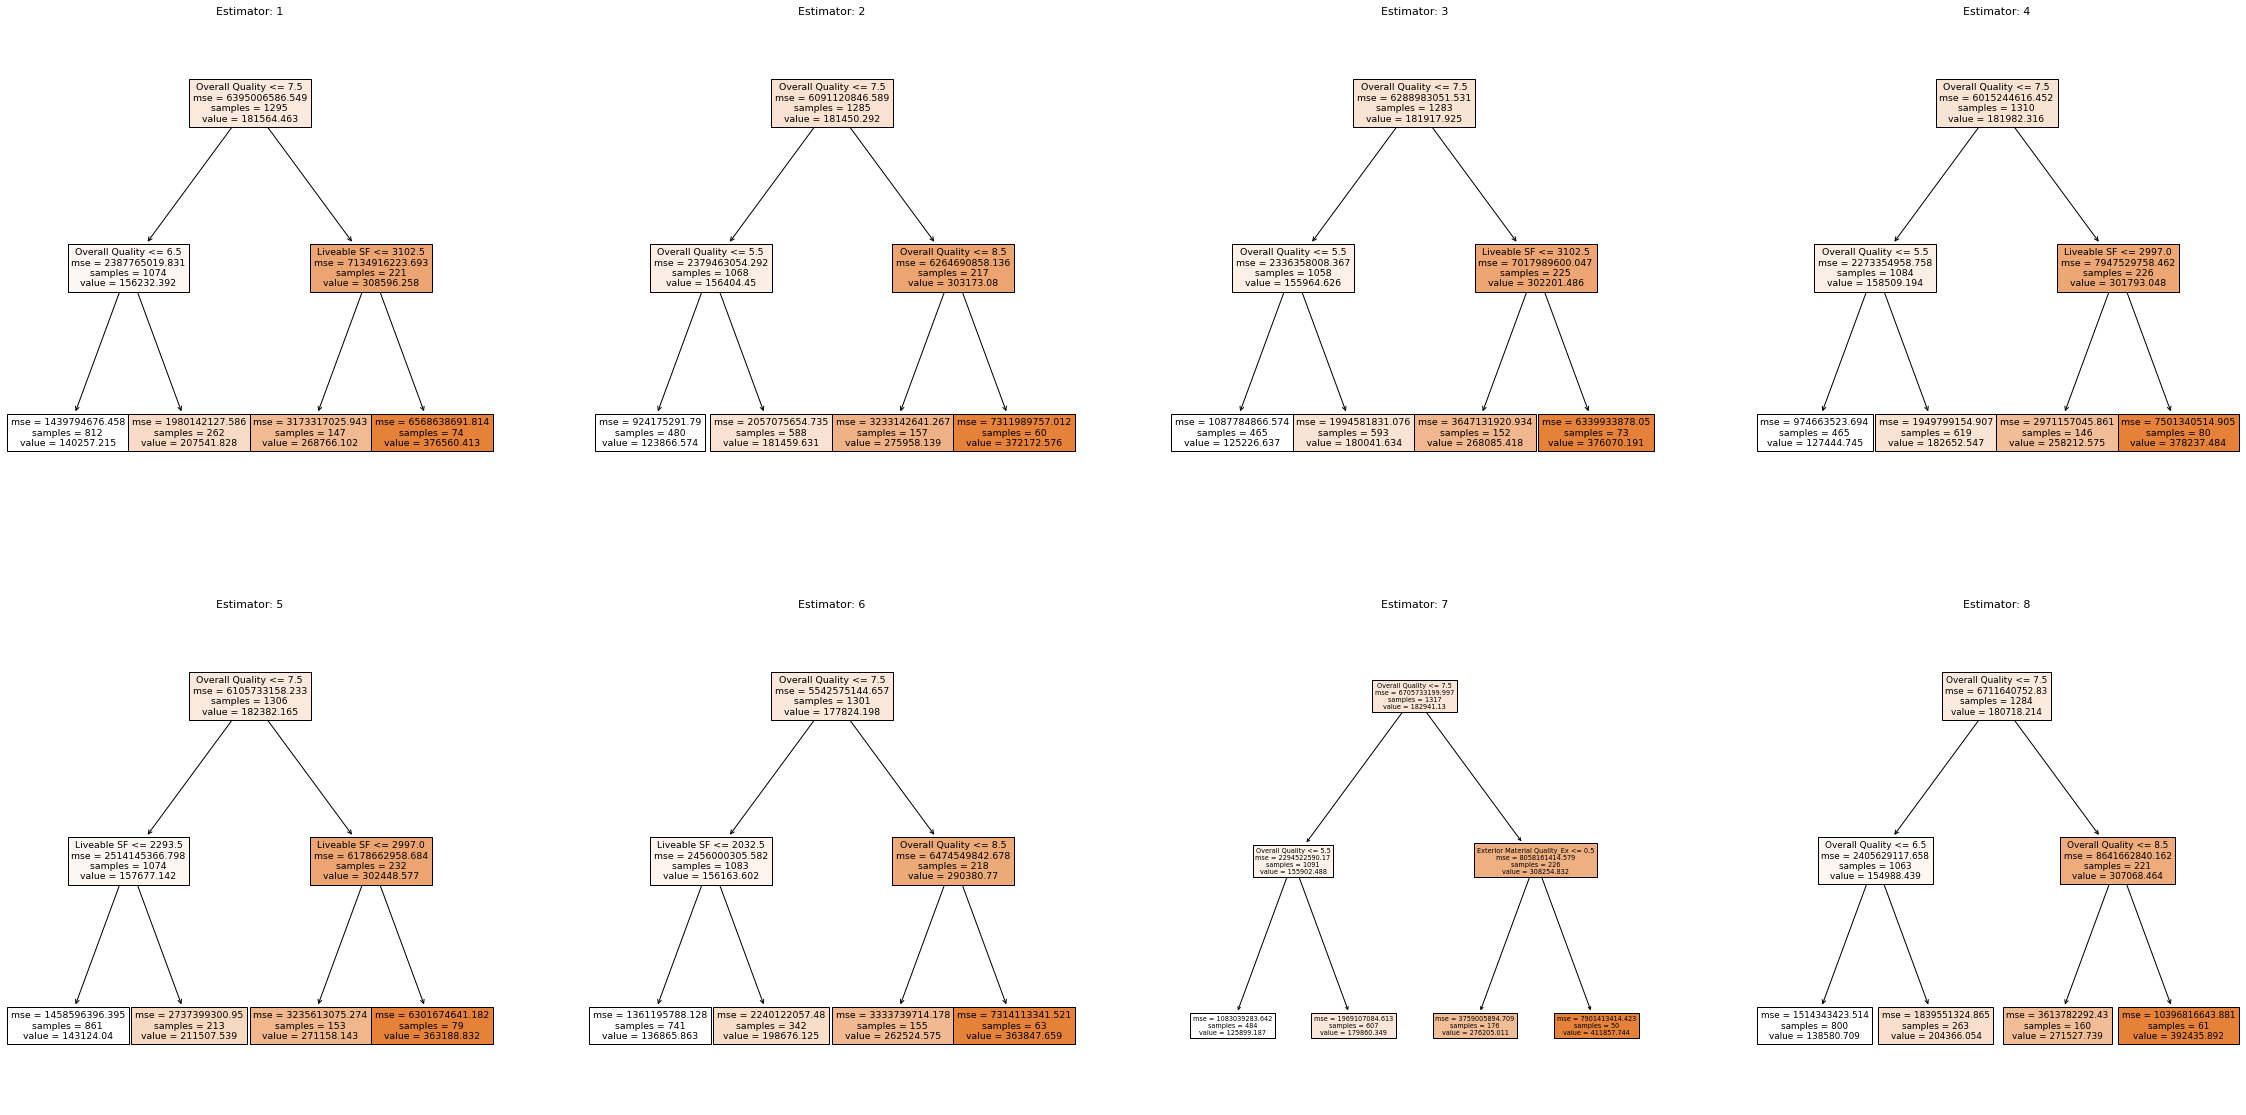

In [32]:
rows = 2
cols = 4

fig, axes = plt.subplots(nrows = rows,ncols = cols,figsize = (cols*10,rows*10))
for index in range(0, rows*cols):
    row = int(index / cols)
    col = index - row*cols
    plot_tree(rfr.estimators_[index],
               feature_names = train.columns, 
               filled = True,
               ax = axes[row, col]);

    axes[row, col].set_title('Estimator: ' + str(index + 1), fontsize = 11)

## k-NN Regression

In [33]:
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(n_neighbors=2)

knn.fit(train, y_train)

NearestNeighbors(n_neighbors=2)

## Appendix

In [ ]:
data.columns[data.columns.str.lower().contains('Garage')]